## Semantic Inpainting

In [10]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from utils import crop

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

## Create DCGan object to test out inpainting function

In [11]:
from model import *

In [12]:
#import a single image
img = mpimg.imread('00004.jpg')
img = crop(img)
img = np.reshape(img, (64, 64,3,1))

# Testing out inpainting function

In [25]:
with tf.Session() as sess:
    model = DCGAN(sess, input_height=64, input_width=64, batch_size=64, sample_num = 64, output_height=64, output_width=64,
                 g_dim=[1024, 512, 256, 128], d_dim=[64, 128, 256, 512], s_size=4, z_dim=100, dataset='svhn')
    learning_rate = 0.1
    test_image = img
    iterations = 10
    new_image = model.inpainting(learning_rate,test_image,iterations,mask_choice='random_mask',lamda=0.002)
    n = new_image.eval()
    n = np.reshape(n,(64,64,3))

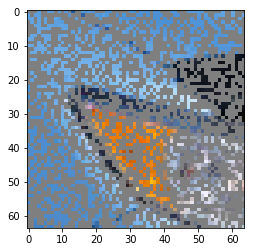

In [26]:
n = n.astype(int)
plt.imshow(n)
plt.show()
